In [1]:
# native
import os, sys
import pandas as pd 
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# local
sys.path.append("..")
from data.loader import SimulatedSpectralData
from data.splitter import Splitter

def make_visdf(X, y, seasons):
    df = pd.DataFrame(X).reset_index()
    df["season"] = seasons
    df["y"] = y
    df["y_cls"] = y > np.median(y)
    df = df.melt(id_vars=["index", "season", "y_cls", "y"], var_name="spectra", value_name="reflectance")
    return df

In [2]:
n = 30
spectral_data = SimulatedSpectralData()
X, y = spectral_data.sample(n, seed=24061)
Tu = spectral_data.Tu
Pu = spectral_data.Pu
Xu = spectral_data.Xu
Td = spectral_data.Td
Pd = spectral_data.Pd
Xd = spectral_data.Xd
X = spectral_data.X
y = spectral_data.y

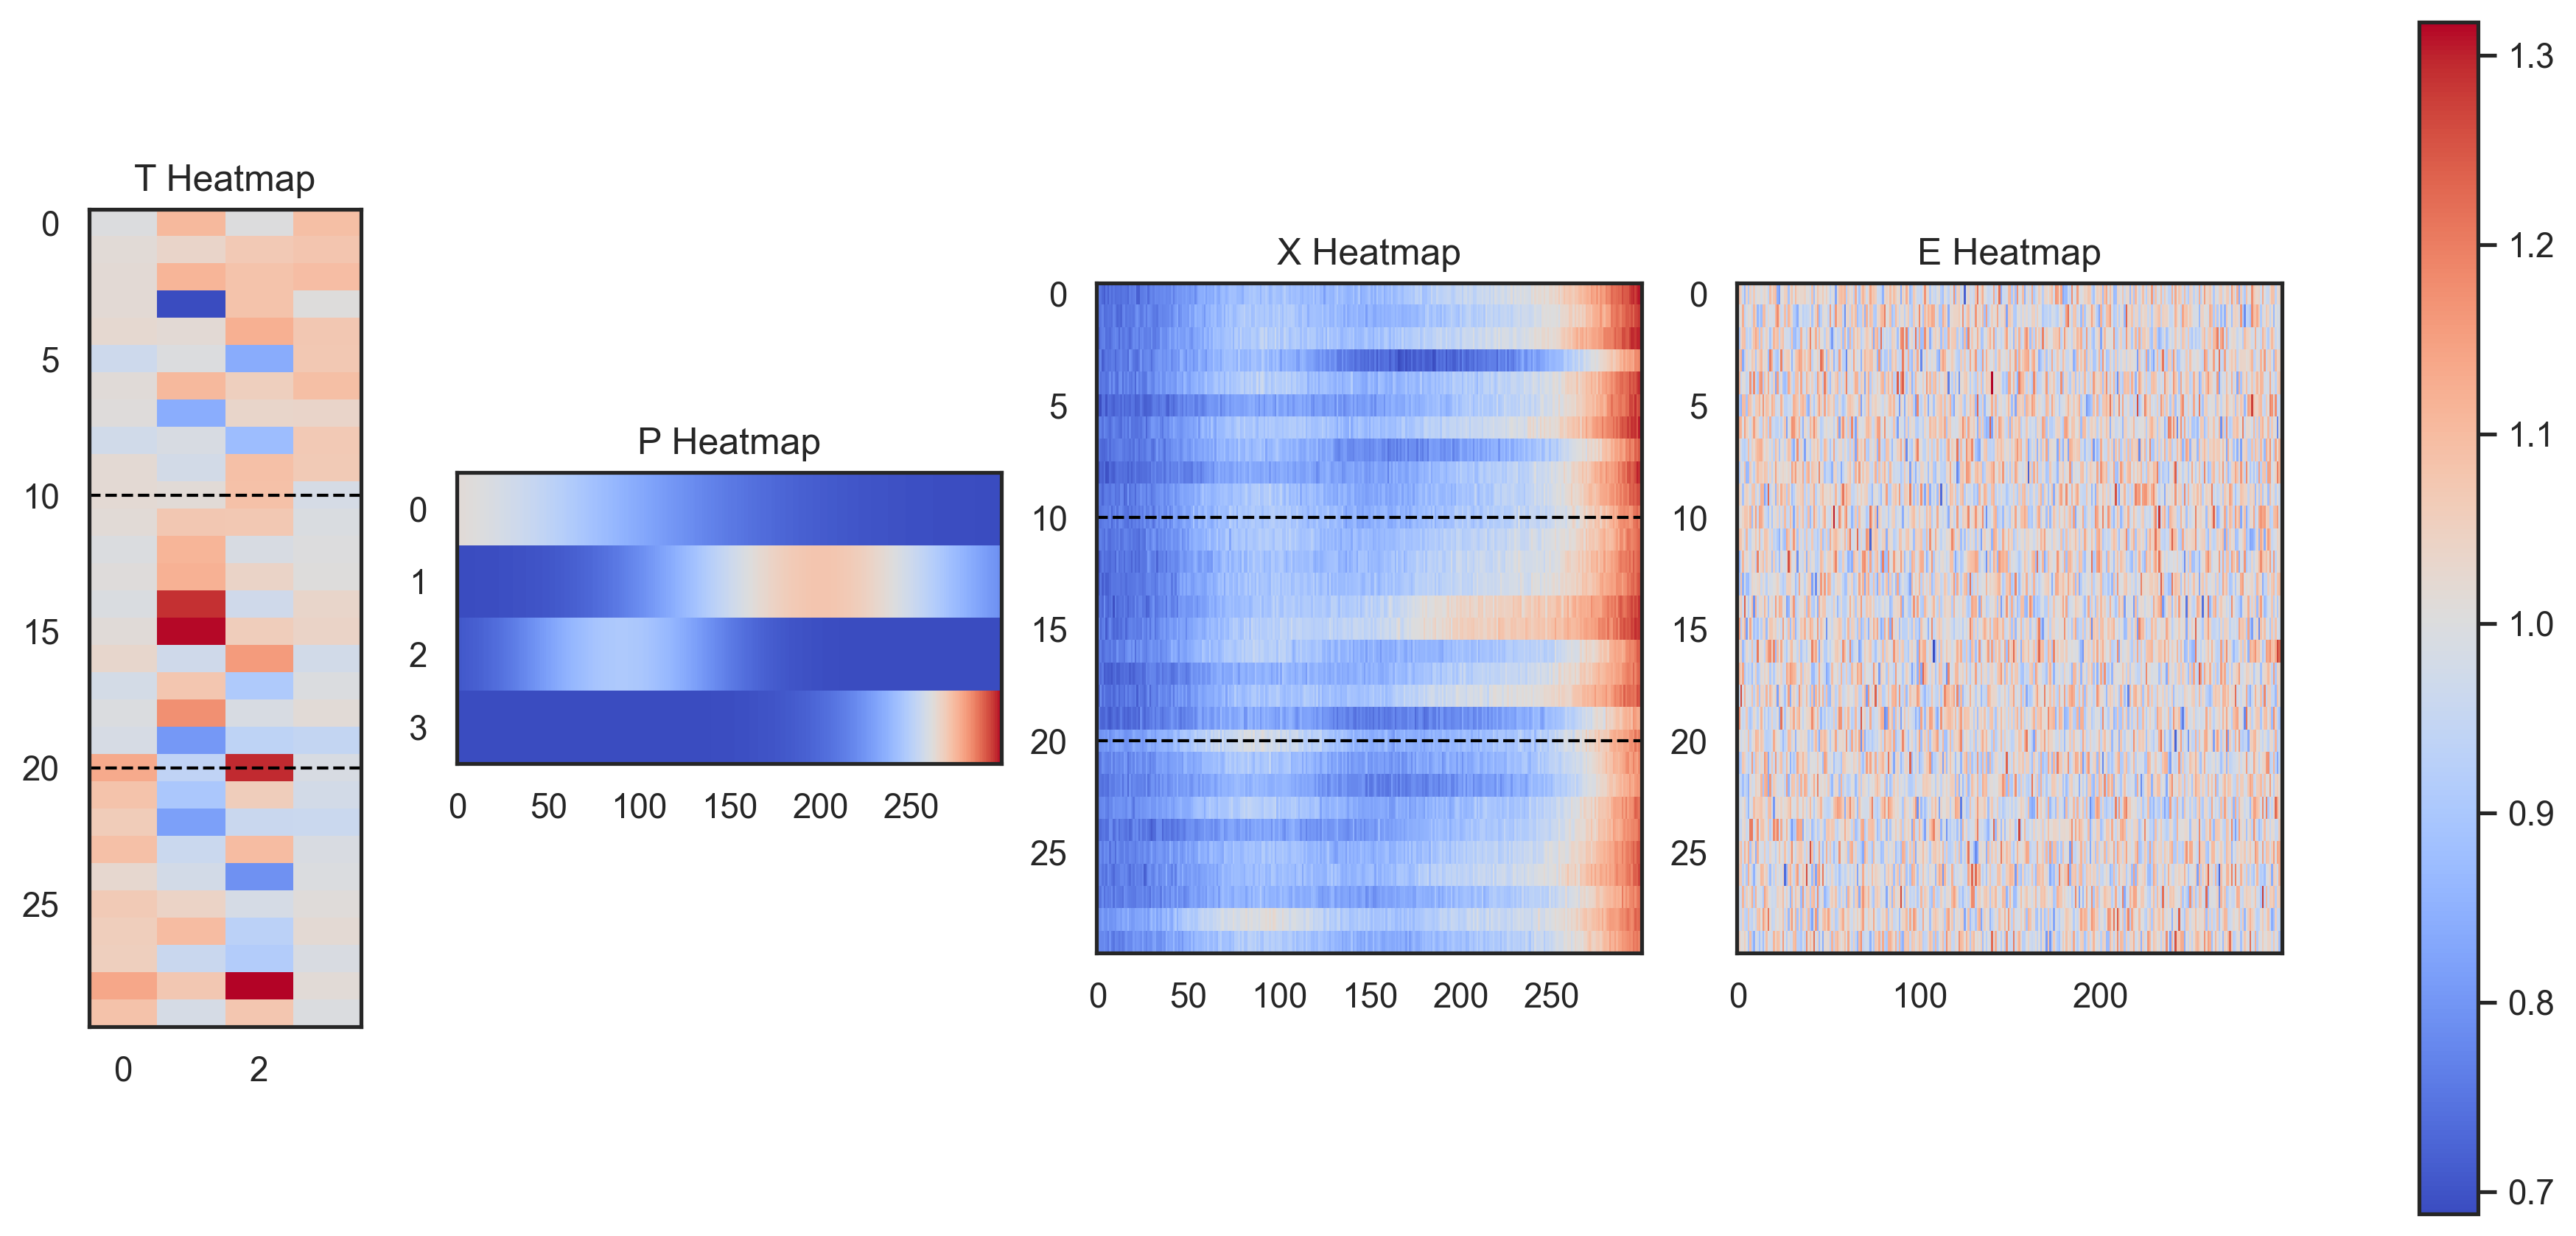

In [29]:
sns.set(style="white")

fig, axes = plt.subplots(nrows=1, ncols=4, 
                        dpi=300,
                        figsize=(16, 7),
                        gridspec_kw={'width_ratios': [1, 2, 2, 2]})

T = np.concatenate((Tu, Td), axis=1)
P = np.concatenate((Pu, Pd), axis=0)
E = np.random.normal(0, 0.1, Xu.shape)

im0 = axes[0].imshow(T, cmap='coolwarm', aspect=1/2.5, interpolation="None",)
im1 = axes[1].imshow(P, cmap='coolwarm', aspect=40, interpolation="None")
im2 = axes[2].imshow(X + E, cmap='coolwarm',  aspect=12.3, interpolation="None")
im3 = axes[3].imshow(E, cmap='coolwarm', aspect=12.3, interpolation="None")
fig.colorbar(im0, ax=axes, orientation='vertical')

# First subplot (Tu)
axes[0].axhline(10, color='black', linewidth=1, linestyle='--')
axes[0].axhline(20, color='black', linewidth=1, linestyle='--')
axes[0].set_title("T Heatmap")
# Second subplot (Pu)
axes[1].set_xticks(np.arange(0, Pd.shape[1], step=50))
axes[1].set_title("P Heatmap")
# Xu
axes[2].axhline(10, color='black', linewidth=1, linestyle='--')
axes[2].axhline(20, color='black', linewidth=1, linestyle='--')
axes[2].set_xticks(np.arange(0, Xd.shape[1], step=50))
axes[2].set_title("X Heatmap")
# E
axes[3].set_title("E Heatmap")

plt.savefig("../out/sim_spectral_decomposition.png", dpi=300)
plt.show()

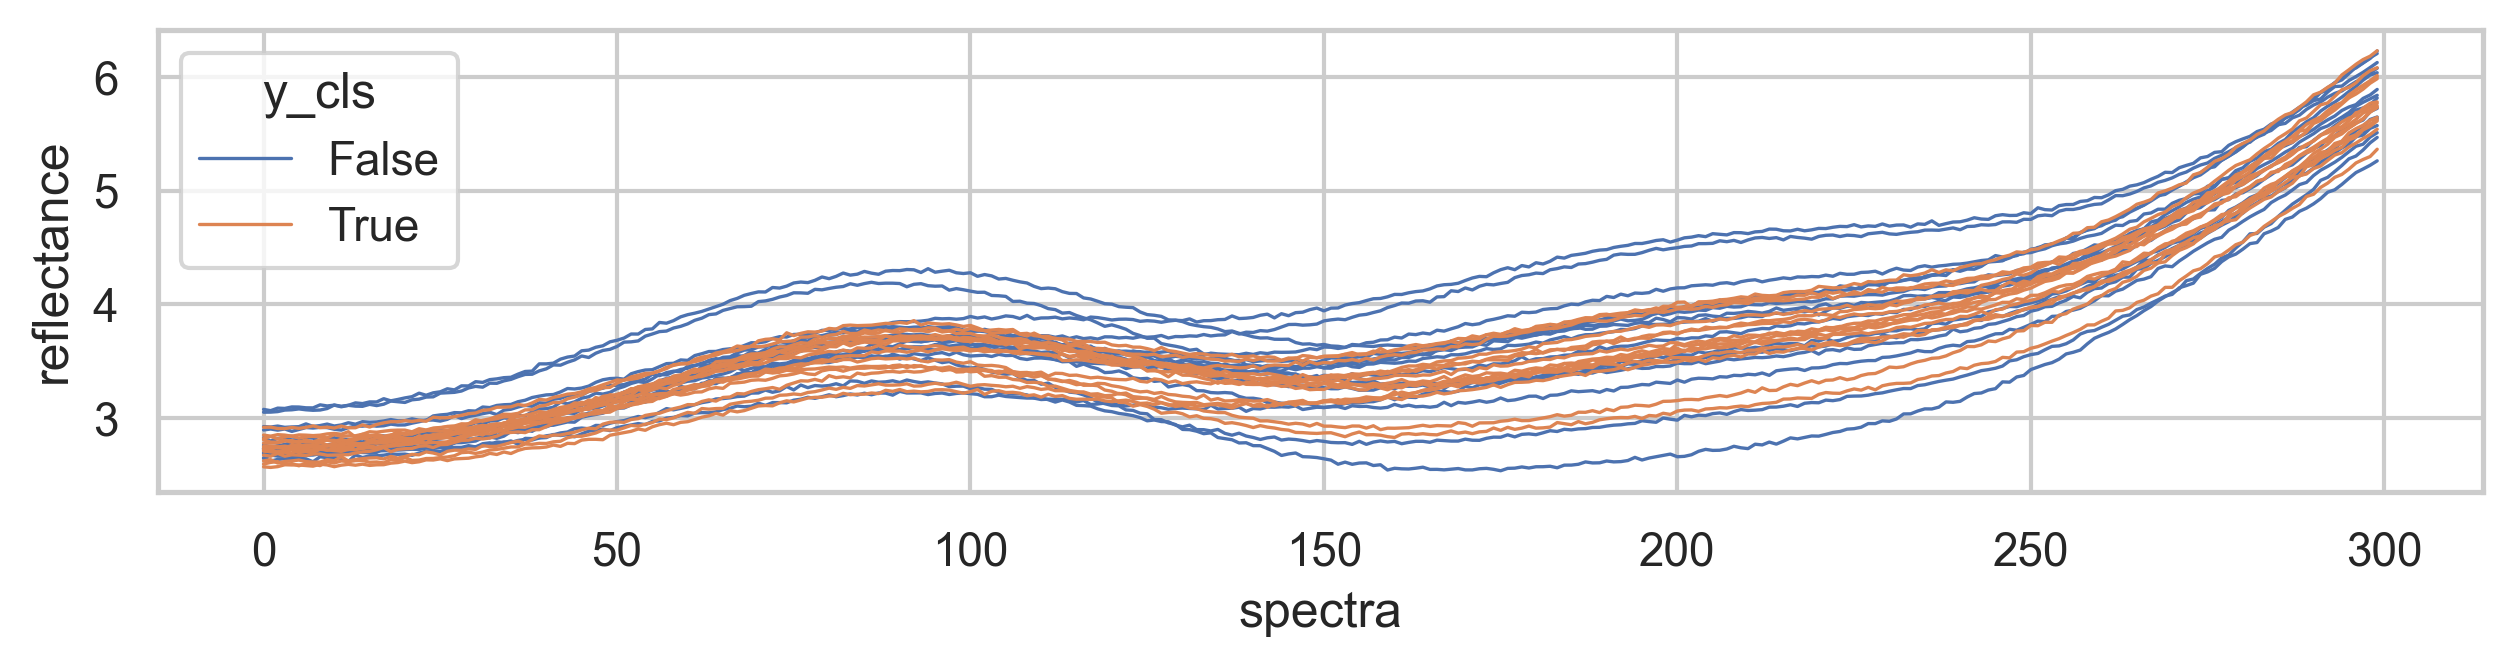

In [21]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471",]
n_eff = n // 3
seasons = ["summer"] * n_eff + ["fall"] * n_eff + ["winter"] * n_eff
df = make_visdf(X, y, seasons)
plt.figure(figsize=(10, 2), dpi=300)
sns.lineplot(x="spectra", y="reflectance", hue="y_cls", data=df,
             linewidth=.8, alpha=1, units='index', estimator=None)
plt.savefig("../out/sim_spectral_lineplot.png", dpi=300)

<Figure size 2700x1800 with 0 Axes>

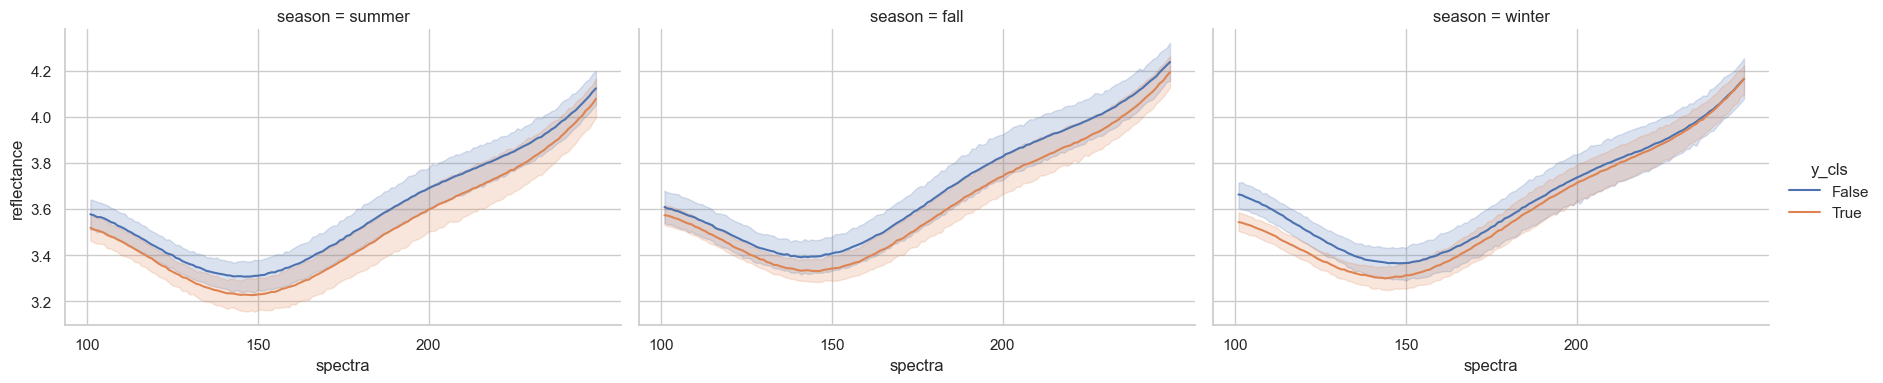

In [33]:
n = 300
spectral_data = SimulatedSpectralData()
X, y = spectral_data.sample(n, seed=24061)
n_eff = n // 3
ls_season = ["summer", "fall", "winter"]
seasons = [ls_season[i % 3] for i in range(n)]

df = make_visdf(X, y, seasons)
df["spectra"] = df["spectra"].astype(int)
param = {"aspect": 1.5, "height": 4, "hue": "y_cls"}

plt.figure(figsize=(9, 6), dpi=300)
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df.query("spectra < 250 and spectra > 100"),
    col="season", col_order=ls_season, 
    **param)
g.set(xticks=[i for i in range(100, 250, 50)])
g.set_xlabels("Spectral Band")
g.set_ylabels("Reflectance")
g.map_dataframe(sns.lineplot, data=df, 
                x="spectra", y="reflectance")
g.add_legend()
plt.savefig("../out/sim_spectral_season_X.png", dpi=300)

<Figure size 2700x1800 with 0 Axes>

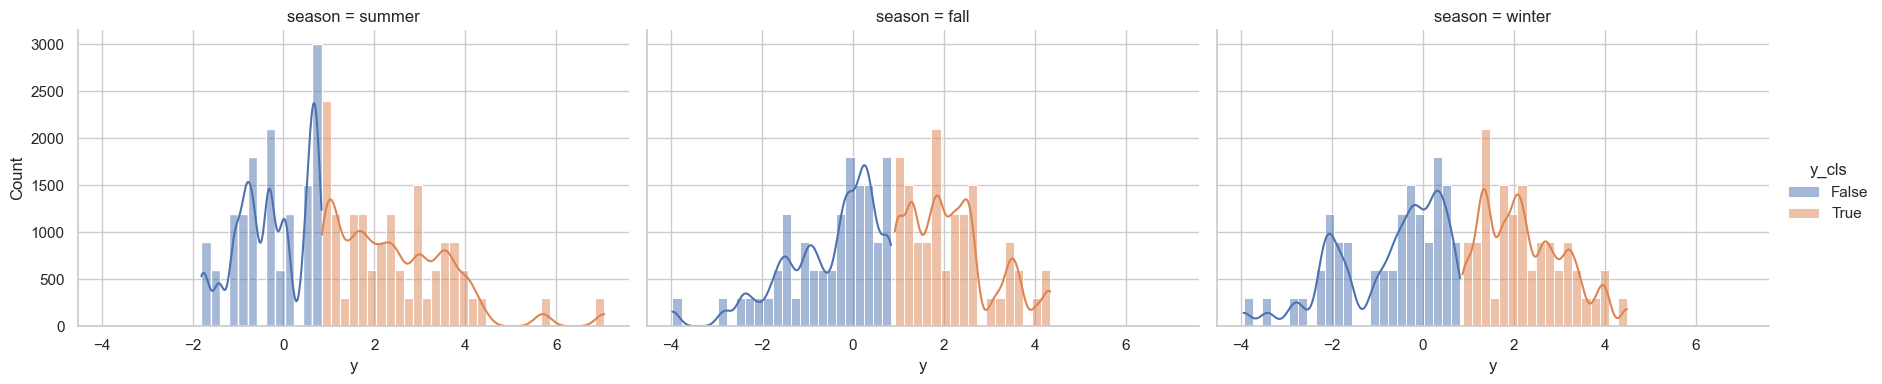

In [22]:
plt.figure(figsize=(9, 6), dpi=300)
g = sns.FacetGrid(df,
    col="season", col_order=ls_season, 
    **param)
g.map(sns.histplot, "y", kde=True, binwidth=0.2)
g.add_legend()
plt.savefig("../out/sim_spectral_season_y.png", dpi=300)

In [31]:
data_grouped = df.groupby(["season", "y_cls"]).agg(
    count=("index", "count"),
    mean=("y", "mean"),
    median=("y", "median"),
    std=("y", "std")
).reset_index()
data_grouped

,season,y_cls,count,mean,median,std
0,fall,False,15300,-0.512067,-0.172584,1.059930
1,fall,True,14700,2.173627,2.042704,0.919796
2,summer,False,14100,-0.259497,-0.287464,0.768756
3,summer,True,15900,2.451059,2.274426,1.285202
4,winter,False,15600,-0.738826,-0.406264,1.161362
5,winter,True,14400,2.252745,2.109262,0.898261


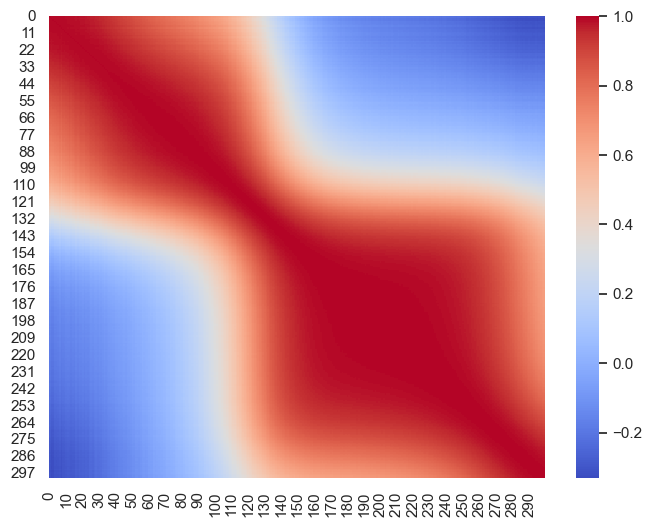

In [29]:
cor_X = pd.DataFrame(X).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor_X, cmap="coolwarm", linecolor='black',)
plt.savefig("../out/sim_spectral_correlation.png", dpi=300)

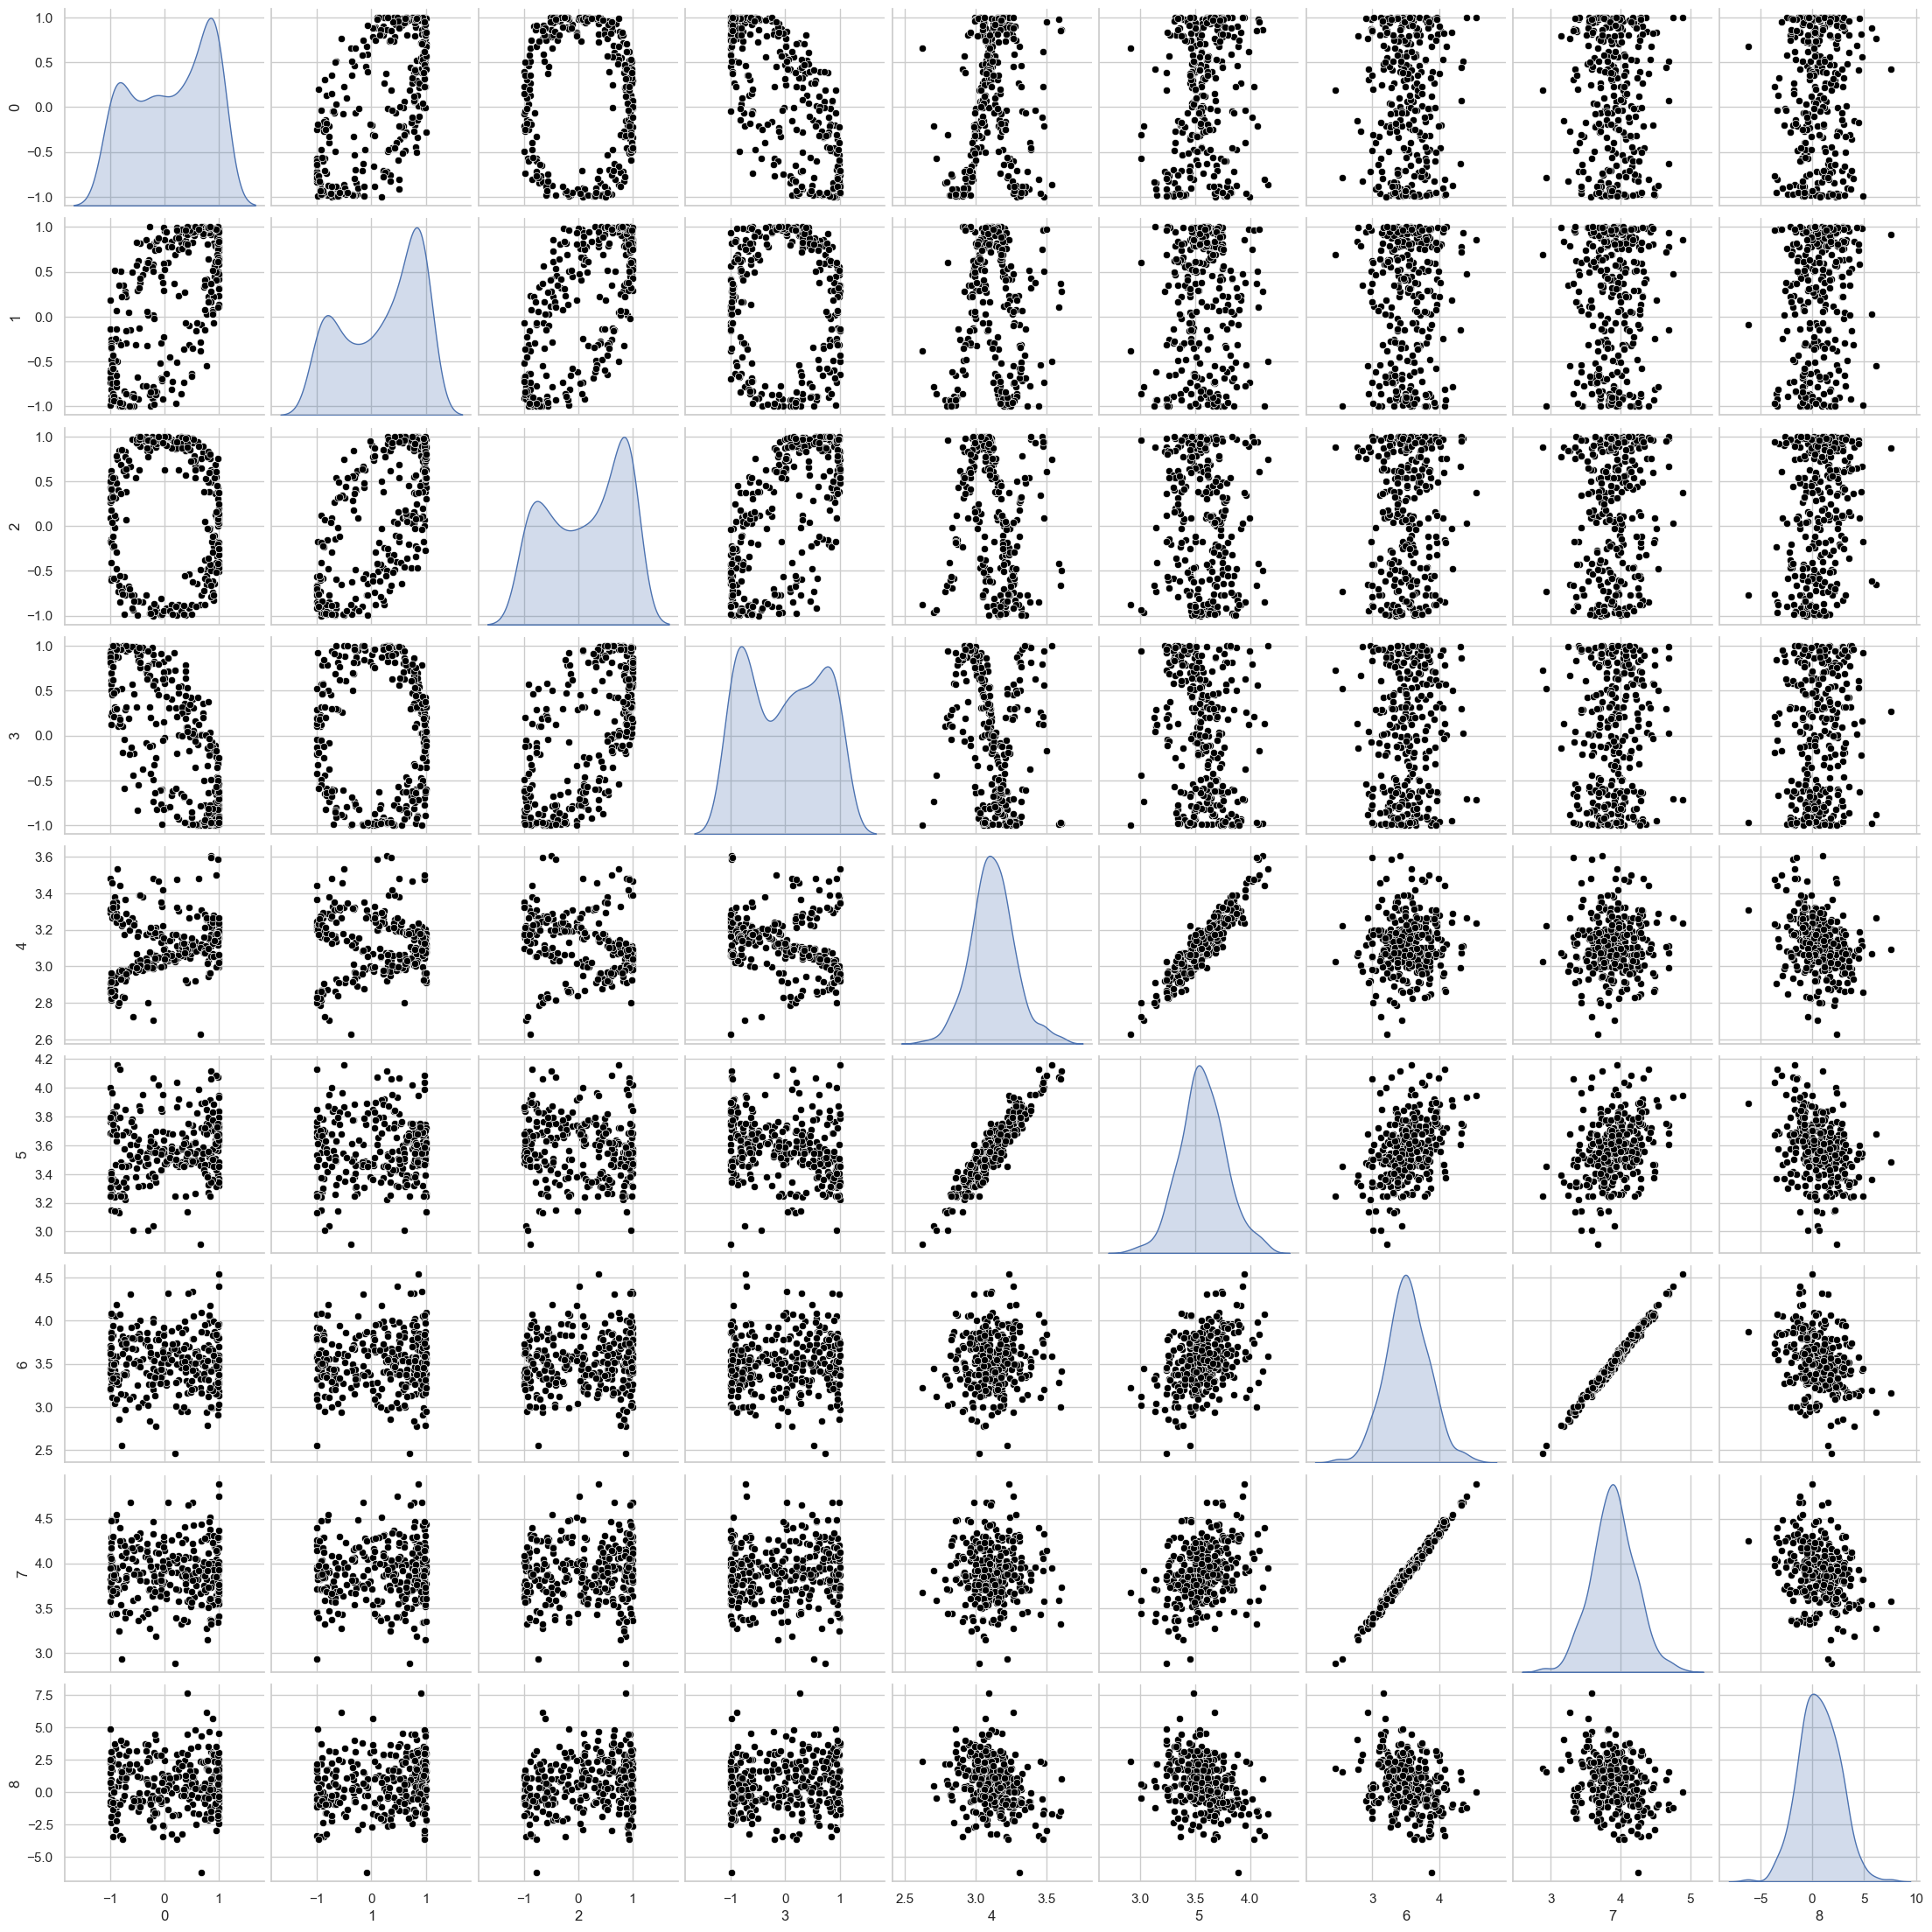

In [11]:
sns.pairplot(df, diag_kind="kde", plot_kws={"color": "black"})